# **Micro-Organism Image Classification**

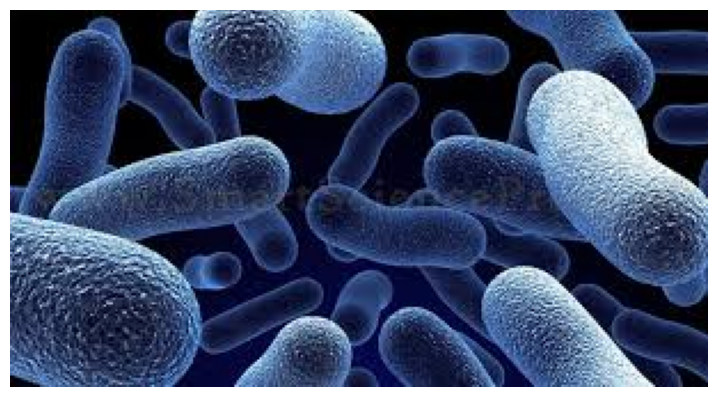

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize = (9 , 9))
img = mpimg.imread('/content/micro.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

# **About Dataset**

Microscopic creatures, like bacteria and tiny organisms, play big roles in science. In fields like health and technology, telling these small creatures apart using pictures is super important for finding diseases, making new medicines, and understanding the environment.

# Use Cases in Life Sciences and Biotechnology


Micro-organism image classification has various applications in the life sciences and biotechnology industries. It aids in:

***Disease Identification*** : Assisting in identifying diseases caused by specific micro-organisms.

***Drug Development*** : Supporting drug discovery by understanding the behavior of different micro-organisms and their response to drugs.

***Environmental Studies***   :  Facilitating environmental monitoring by identifying beneficial or harmful micro-organisms in different ecosystems.

Accurate classification of micro-organisms through deep learning models enhances research, diagnostics, and applications in these fields.

In [1]:
from skimage.io import imread
from skimage.transform import resize
import os
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [2]:
os.listdir('/content/drive/MyDrive/Prjt/DL/Micro_Organism/Training Data')

['Euglena',
 'Yeast',
 'Hydra',
 'Amoeba',
 'Spiral_bacteria',
 'Paramecium',
 'Rod_bacteria',
 'Spherical_bacteria']

In [3]:
os.listdir('/content/drive/MyDrive/Prjt/DL/Micro_Organism/Testing Data')

['Yeast',
 'Spiral_bacteria',
 'Spherical_bacteria',
 'Rod_bacteria',
 'Paramecium',
 'Hydra',
 'Euglena',
 'Amoeba']

In [4]:
datapath='/content/drive/MyDrive/Prjt/DL/Micro_Organism/Training Data'

In [5]:
X_train=[]
y_train=[]
Categories=['Euglena','Yeast','Hydra','Amoeba','Spiral_bacteria','Paramecium','Rod_bacteria','Spherical_bacteria']
for dir in Categories:
  dirpath=os.path.join(datapath,dir)
  # print(dirpath)
  images=os.listdir(dirpath)
  # print(images)
  for img in images:
    imgpath=os.path.join(dirpath,img)
    # print(imgpath)
    img_arr=imread(imgpath)
    img_resize=resize(img_arr,(150,150,3))
    X_train.append(img_resize)
    y_train.append(Categories.index(dir))
  print("Loaded.......",dir)

Loaded....... Euglena
Loaded....... Yeast
Loaded....... Hydra
Loaded....... Amoeba
Loaded....... Spiral_bacteria
Loaded....... Paramecium
Loaded....... Rod_bacteria
Loaded....... Spherical_bacteria


In [6]:
datapath='/content/drive/MyDrive/Prjt/DL/Micro_Organism/Testing Data'

In [7]:
X_test=[]
y_test=[]
Categories=['Euglena','Yeast','Hydra','Amoeba','Spiral_bacteria','Paramecium','Rod_bacteria','Spherical_bacteria']
for dir in Categories:
  dirpath=os.path.join(datapath,dir)
  # print(dirpath)
  images=os.listdir(dirpath)
  # print(images)
  for img in images:
    imgpath=os.path.join(dirpath,img)
    # print(imgpath)
    img_arr=imread(imgpath)
    img_resize=resize(img_arr,(150,150,3))
    X_test.append(img_resize)
    y_test.append(Categories.index(dir))
  print("Loaded.......",dir)

Loaded....... Euglena
Loaded....... Yeast
Loaded....... Hydra
Loaded....... Amoeba
Loaded....... Spiral_bacteria
Loaded....... Paramecium
Loaded....... Rod_bacteria
Loaded....... Spherical_bacteria


In [8]:
len(X_train),len(y_train)

(788, 788)

In [9]:
len(X_test),len(y_test)

(789, 789)

In [10]:
import numpy as np
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [11]:
X_train.shape

(788, 150, 150, 3)

In [12]:
X_test.shape

(789, 150, 150, 3)

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(8,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(X_train,y_train,epochs=20,batch_size=16)

Epoch 1/20
50/50 [==============================] - 28s 524ms/step - loss: 6.9056 - accuracy: 0.2119
Epoch 2/20
50/50 [==============================] - 27s 535ms/step - loss: 1.8146 - accuracy: 0.3782
Epoch 3/20
50/50 [==============================] - 27s 537ms/step - loss: 1.5348 - accuracy: 0.4886
Epoch 4/20
50/50 [==============================] - 32s 645ms/step - loss: 1.1967 - accuracy: 0.6168
Epoch 5/20
50/50 [==============================] - 26s 524ms/step - loss: 0.8491 - accuracy: 0.7551
Epoch 6/20
50/50 [==============================] - 26s 508ms/step - loss: 0.6401 - accuracy: 0.8287
Epoch 7/20
50/50 [==============================] - 27s 548ms/step - loss: 0.4548 - accuracy: 0.8832
Epoch 8/20
50/50 [==============================] - 27s 548ms/step - loss: 0.3420 - accuracy: 0.9302
Epoch 9/20
50/50 [==============================] - 28s 554ms/step - loss: 0.2534 - accuracy: 0.9442
Epoch 10/20
50/50 [==============================] - 25s 499ms/step - loss: 0.2008 - accura

In [16]:
model.evaluate(X_test,y_test)

25/25 [==============================] - 6s 230ms/step - loss: 0.1244 - accuracy: 0.9810


[0.12441381067037582, 0.980988621711731]

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
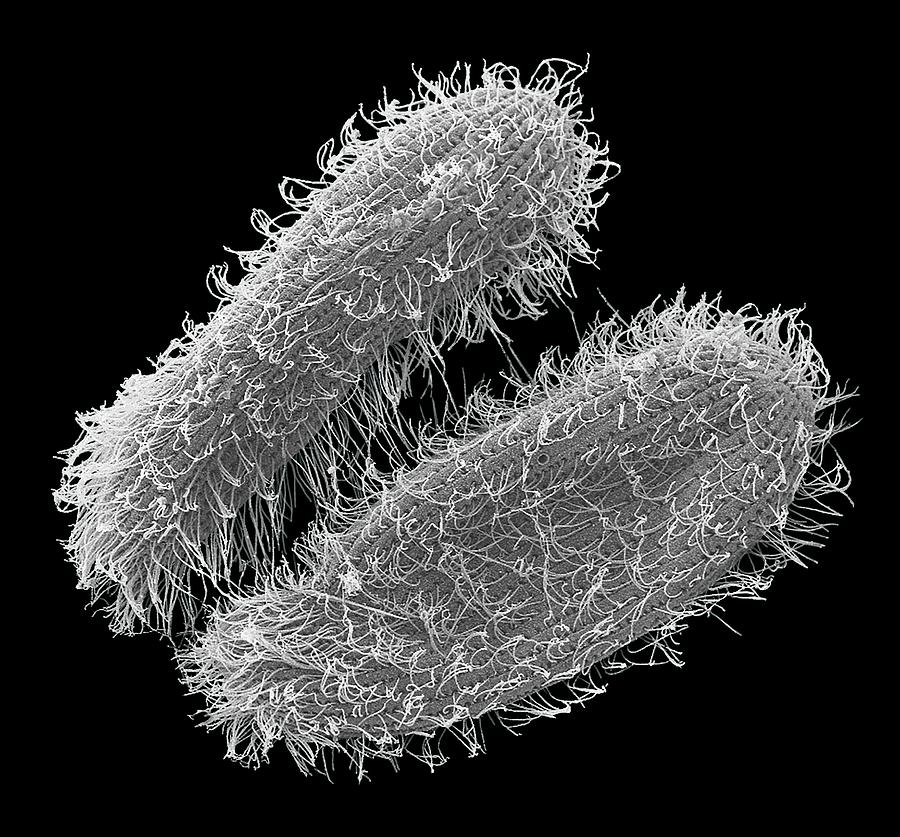

In [42]:
# imgpath='/content/drive/MyDrive/Prjt/DL/Micro_Organism/Testing Data/Euglena/Image_101.jpg'
# imgpath='/content/drive/MyDrive/Prjt/DL/Micro_Organism/Training Data/Spiral_bacteria/Image_5.jpg'
imgpath='/content/drive/MyDrive/Prjt/DL/Micro_Organism/Training Data/Paramecium/Image_161.jpg'
img=imread(imgpath)
img

In [38]:
img=resize(img,(150,150,3))
type(img)

numpy.ndarray

In [39]:
img=img.reshape(1,150,150,3)
y_new=model.predict(img)
y_new

1/1 [==============================] - 0s 42ms/step


array([[9.9942088e-01, 2.0229347e-06, 1.1435981e-06, 7.9635456e-06,
        8.4179163e-07, 5.6510291e-04, 9.3880118e-08, 2.0061680e-06]],
      dtype=float32)

In [40]:
ind=y_new.argmax(axis=1)
ind

array([0])

In [41]:
Categories[ind.item()]

'Euglena'

In [43]:
model.save("Microorganism.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
